# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:


# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
temp_units = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q="

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete")

Processing Record 1 of Set 1 | santo domingo
City not found. Skipping...
Processing Record 2 of Set 1 | lubu
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | carnarvon
Processing Record 5 of Set 1 | avarua
Processing Record 6 of Set 1 | katsuura
City not found. Skipping...
Processing Record 7 of Set 1 | ayan
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | cairns
Processing Record 10 of Set 1 | severo-kurilsk
City not found. Skipping...
Processing Record 11 of Set 1 | qaanaaq
Processing Record 12 of Set 1 | lingolsheim
Processing Record 13 of Set 1 | chokurdakh
Processing Record 14 of Set 1 | port alfred
Processing Record 15 of Set 1 | upernavik
Processing Record 16 of Set 1 | tuktoyaktuk
Processing Record 17 of Set 1 | hermanus
Processing Record 18 of Set 1 | sinnamary
Processing Record 19 of Set 1 | banjar
Processing Record 20 of Set 1 | kloulklubed
Processing Record 21 of Set 1 | khatanga
Processing Record 22 of Set 1 | vao
Processing Record 23

Processing Record 33 of Set 4 | nanpiao
Processing Record 34 of Set 4 | iskateley
Processing Record 35 of Set 4 | kahului
City not found. Skipping...
Processing Record 36 of Set 4 | pullman
Processing Record 37 of Set 4 | libertador general san martin
Processing Record 38 of Set 4 | yaan
Processing Record 39 of Set 4 | hofn
Processing Record 40 of Set 4 | kalmunai
City not found. Skipping...
City not found. Skipping...
Processing Record 41 of Set 4 | bredasdorp
Processing Record 42 of Set 4 | nizwa
Processing Record 43 of Set 4 | vestmannaeyjar
Processing Record 44 of Set 4 | itarema
City not found. Skipping...
Processing Record 45 of Set 4 | sabang
Processing Record 46 of Set 4 | buala
City not found. Skipping...
Processing Record 47 of Set 4 | mar del plata
Processing Record 48 of Set 4 | kodiak
Processing Record 49 of Set 4 | lesnoye
Processing Record 1 of Set 5 | alofi
Processing Record 2 of Set 5 | sola
City not found. Skipping...
Processing Record 3 of Set 5 | lima
Processing Rec

Processing Record 16 of Set 8 | coquimbo
Processing Record 17 of Set 8 | kouroussa
Processing Record 18 of Set 8 | twin falls
City not found. Skipping...
Processing Record 19 of Set 8 | odiong
Processing Record 20 of Set 8 | fredonia
Processing Record 21 of Set 8 | santa cruz cabralia
Processing Record 22 of Set 8 | huilong
Processing Record 23 of Set 8 | knysna
Processing Record 24 of Set 8 | victor rosales
Processing Record 25 of Set 8 | mutoko
Processing Record 26 of Set 8 | yantal
Processing Record 27 of Set 8 | henstedt-ulzburg
Processing Record 28 of Set 8 | bassum
City not found. Skipping...
Processing Record 29 of Set 8 | lodja
Processing Record 30 of Set 8 | innisfail
Processing Record 31 of Set 8 | bayan
Processing Record 32 of Set 8 | azangaro
Processing Record 33 of Set 8 | puerto leguizamo
Processing Record 34 of Set 8 | dukat
Processing Record 35 of Set 8 | tabuk
Processing Record 36 of Set 8 | farmington
Processing Record 37 of Set 8 | dingle
Processing Record 38 of Set 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# create a dictionary for establishing dataframe
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}
weather_dict

{'City': ['santo domingo',
  'lubu',
  'vaini',
  'carnarvon',
  'avarua',
  'katsuura',
  'ayan',
  'albany',
  'cairns',
  'severo-kurilsk',
  'qaanaaq',
  'lingolsheim',
  'chokurdakh',
  'port alfred',
  'upernavik',
  'tuktoyaktuk',
  'hermanus',
  'sinnamary',
  'banjar',
  'kloulklubed',
  'khatanga',
  'vao',
  'nanortalik',
  'skjervoy',
  'timiryazevskiy',
  'barrow',
  'grand gaube',
  'berlevag',
  'hobart',
  'ranfurly',
  'puerto ayora',
  'cabo san lucas',
  'tasiilaq',
  'kodinar',
  'clyde river',
  'cape town',
  'longyearbyen',
  'ribeira grande',
  'vredendal',
  'ushuaia',
  'punta arenas',
  'port blair',
  'fortuna',
  'new norfolk',
  'rikitea',
  'namibe',
  'bluff',
  'manta',
  'ketchikan',
  'broome',
  'georgetown',
  'abu samrah',
  'pangnirtung',
  'dikson',
  'pimentel',
  'arraial do cabo',
  'puerto maldonado',
  'souillac',
  'hilo',
  'bronnitsy',
  'camapua',
  'busselton',
  'miraflores',
  'nikolskoye',
  'saskylakh',
  'atuona',
  'mogadishu',
  

In [5]:
#making dataframe from weather dictionary
weather_dataframe = pd.DataFrame(weather_dict)
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,santo domingo,100,EC,1569550998,86,-0.59,-80.00,69.86,3.38
1,lubu,0,CN,1569550998,36,23.17,112.28,85.52,3.51
2,vaini,75,IN,1569550999,94,15.34,74.49,71.60,6.93
3,carnarvon,0,ZA,1569550999,18,-30.97,22.13,50.42,5.19
4,avarua,100,CK,1569550944,78,-21.21,-159.78,77.00,3.36


In [8]:
#creating and displaying csv from dataframe for further referencing 
weather_dataframe.to_csv(output_data_file)
weather_dataframe.count()

City          523
Cloudiness    523
Country       523
Date          523
Humidity      523
Lat           523
Lng           523
Max Temp      523
Wind Speed    523
dtype: int64

In [ ]:
#Displaying weather dataframe for analysis

In [10]:
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,santo domingo,100,EC,1569550998,86,-0.59,-80.00,69.86,3.38
1,lubu,0,CN,1569550998,36,23.17,112.28,85.52,3.51
2,vaini,75,IN,1569550999,94,15.34,74.49,71.60,6.93
3,carnarvon,0,ZA,1569550999,18,-30.97,22.13,50.42,5.19
4,avarua,100,CK,1569550944,78,-21.21,-159.78,77.00,3.36


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

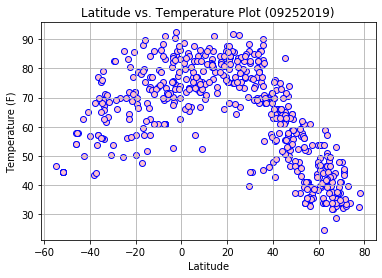

In [18]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Max Temp"], edgecolors = "blue", facecolors="pink")
plt.title("Latitude vs. Temperature Plot (09252019)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid (b=True)
plt.savefig("CityLat_v_MaxTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

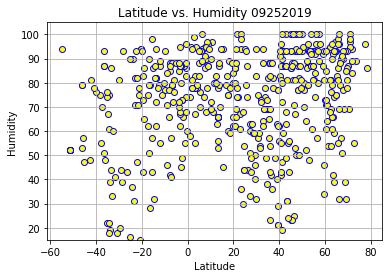

In [21]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Humidity"],edgecolors="blue",facecolors="yellow")
plt.title("Latitude vs. Humidity 09252019")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.ylim(15,105)
plt.grid (b=True)
plt.savefig("Latitude_vs_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

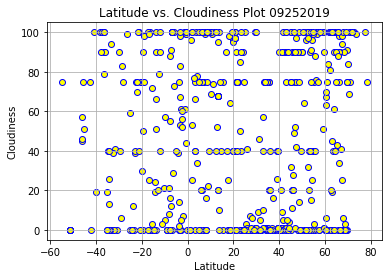

In [25]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudiness"],edgecolors="blue",facecolors="yellow")
plt.title("Latitude vs. Cloudiness Plot 09252019")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid (b=True)
plt.savefig("Latitude_vs_cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

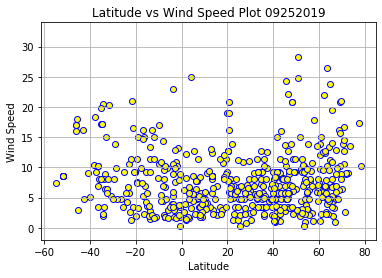

In [24]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Wind Speed"],edgecolors="blue",facecolors="yellow")
plt.title("Latitude vs Wind Speed Plot 09252019")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.ylim(-2,34)
plt.grid (b=True)
plt.savefig("Latitude_vs_WindSpeed.png")
plt.show()